In [1]:
pip install ipython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.8 MB/s eta 0:00:00


In [2]:
pip install yfinance

In [3]:
!pip install xgboost

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # visualization
import seaborn as sns
from pylab import rcParams
from matplotlib import pyplot
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error
from xgboost import plot_importance, plot_tree
from sklearn.metrics import r2_score
# Warnings Ignore
import warnings
warnings.filterwarnings("ignore")

In [5]:
import yfinance as yf
import datetime

In [6]:
start = datetime.datetime(2019,1,1)
end = datetime.datetime(2022,12,28)

In [7]:
amzn=yf.Ticker("AMZN")

In [8]:
AMZN=amzn.history(start=start, end=end)
print(AMZN)

                                Open       High        Low      Close  \
Date                                                                    
2019-01-02 00:00:00-05:00  73.260002  77.667999  73.046501  76.956497   
2019-01-03 00:00:00-05:00  76.000504  76.900002  74.855499  75.014000   
2019-01-04 00:00:00-05:00  76.500000  79.699997  75.915497  78.769501   
2019-01-07 00:00:00-05:00  80.115501  81.727997  79.459503  81.475502   
2019-01-08 00:00:00-05:00  83.234497  83.830498  80.830498  82.829002   
...                              ...        ...        ...        ...   
2022-12-20 00:00:00-05:00  85.330002  86.610001  84.330002  85.190002   
2022-12-21 00:00:00-05:00  86.180000  87.230003  85.209999  86.769997   
2022-12-22 00:00:00-05:00  85.519997  85.680000  82.250000  83.790001   
2022-12-23 00:00:00-05:00  83.250000  85.779999  82.930000  85.250000   
2022-12-27 00:00:00-05:00  84.970001  85.349998  83.000000  83.040001   

                              Volume  Dividends  S

In [9]:
AMZN.head(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-01-02 00:00:00-05:00,73.260002,77.667999,73.046501,76.956497,159662000,0.0,0.0
2019-01-03 00:00:00-05:00,76.000504,76.900002,74.855499,75.014000,139512000,0.0,0.0
2019-01-04 00:00:00-05:00,76.500000,79.699997,75.915497,78.769501,183652000,0.0,0.0
2019-01-07 00:00:00-05:00,80.115501,81.727997,79.459503,81.475502,159864000,0.0,0.0
2019-01-08 00:00:00-05:00,83.234497,83.830498,80.830498,82.829002,177628000,0.0,0.0


In [10]:
AMZN.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [11]:
AMZN.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,1005.000000,1005.000000,1005.000000,1005.000000,1.005000e+03,1005.0,1005.00000
mean,129.419013,130.982134,127.705804,129.343411,8.004061e+07,0.0,0.01990
std,33.439041,33.780158,33.010735,33.351548,3.472018e+07,0.0,0.63088
min,73.260002,76.900002,73.046501,75.014000,1.762600e+07,0.0,0.00000
25%,94.040001,94.977501,92.973999,94.046501,5.647600e+07,0.0,0.00000
50%,129.500000,131.000000,126.330002,128.550003,7.029800e+07,0.0,0.00000
75%,161.154999,162.897507,159.208496,161.190994,9.388600e+07,0.0,0.00000
max,187.199997,188.654007,184.839493,186.570496,3.113460e+08,0.0,20.00000


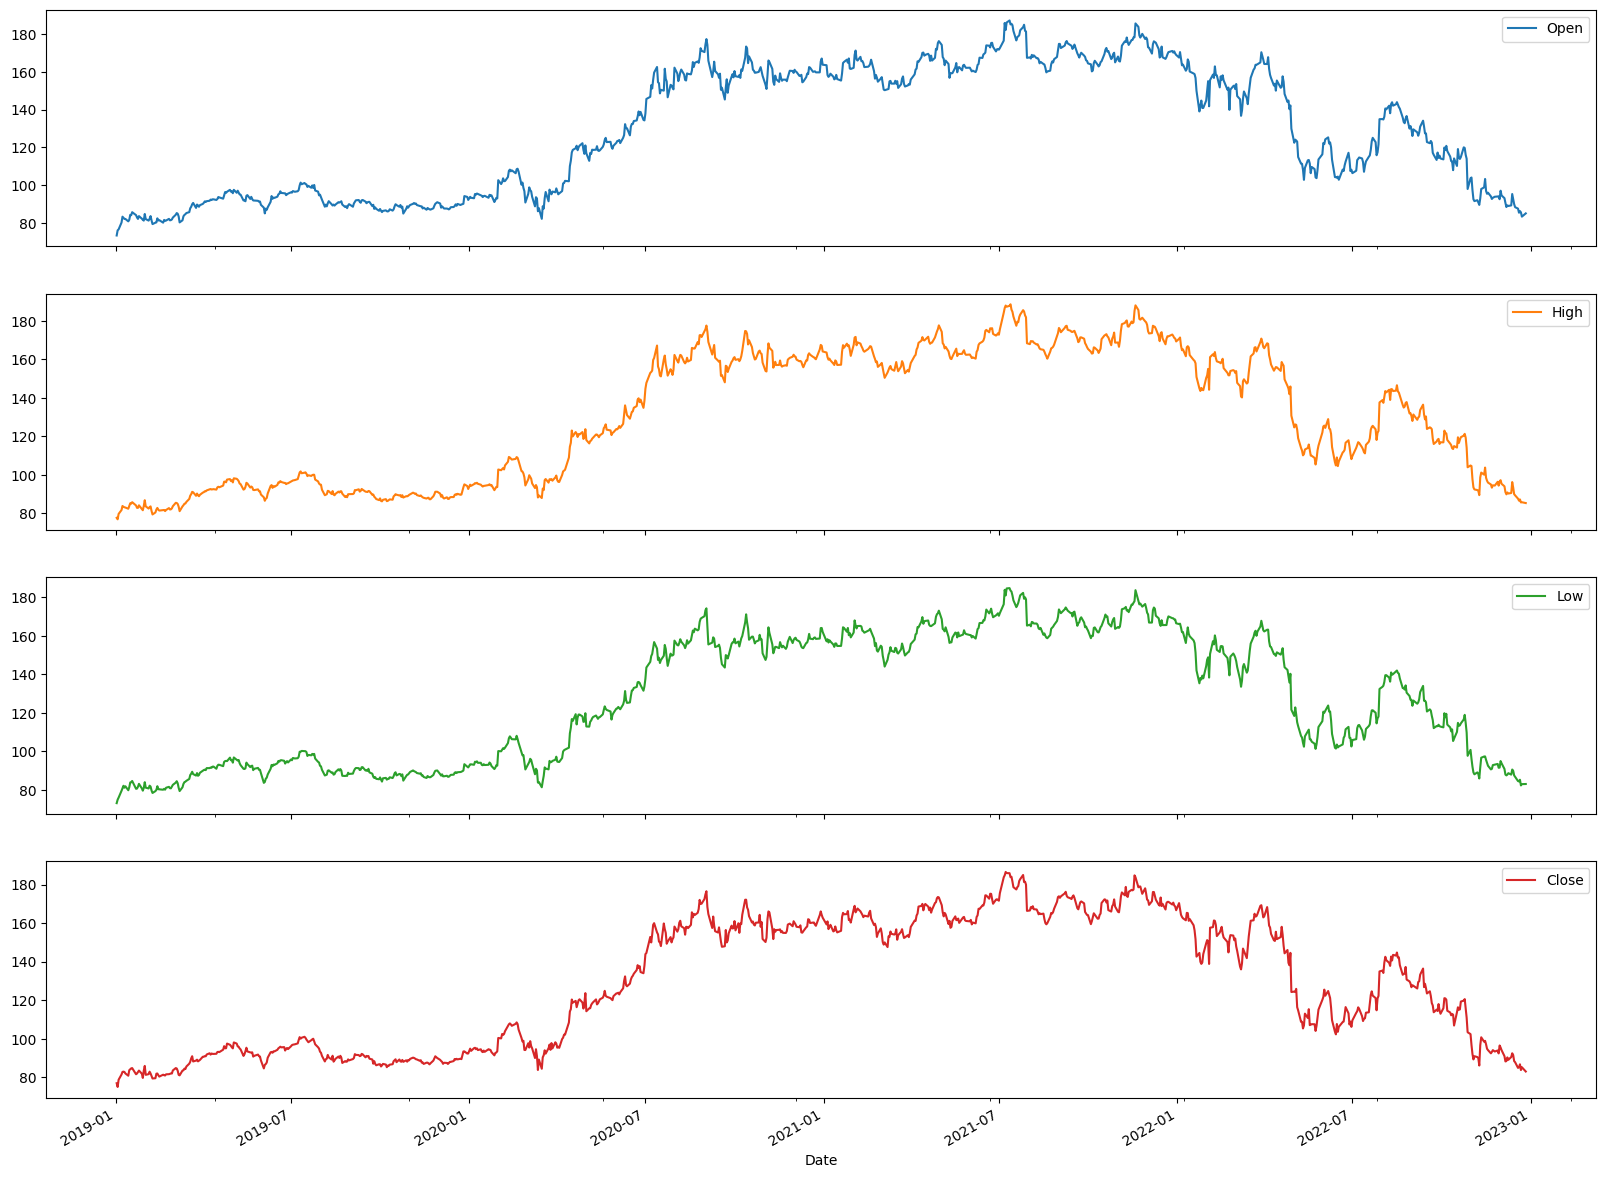

In [12]:
cols_plot = ['Open', 'High', 'Low','Close']
AMZN[cols_plot].plot(subplots=True, legend=True, figsize=(20, 16))
pyplot.show()

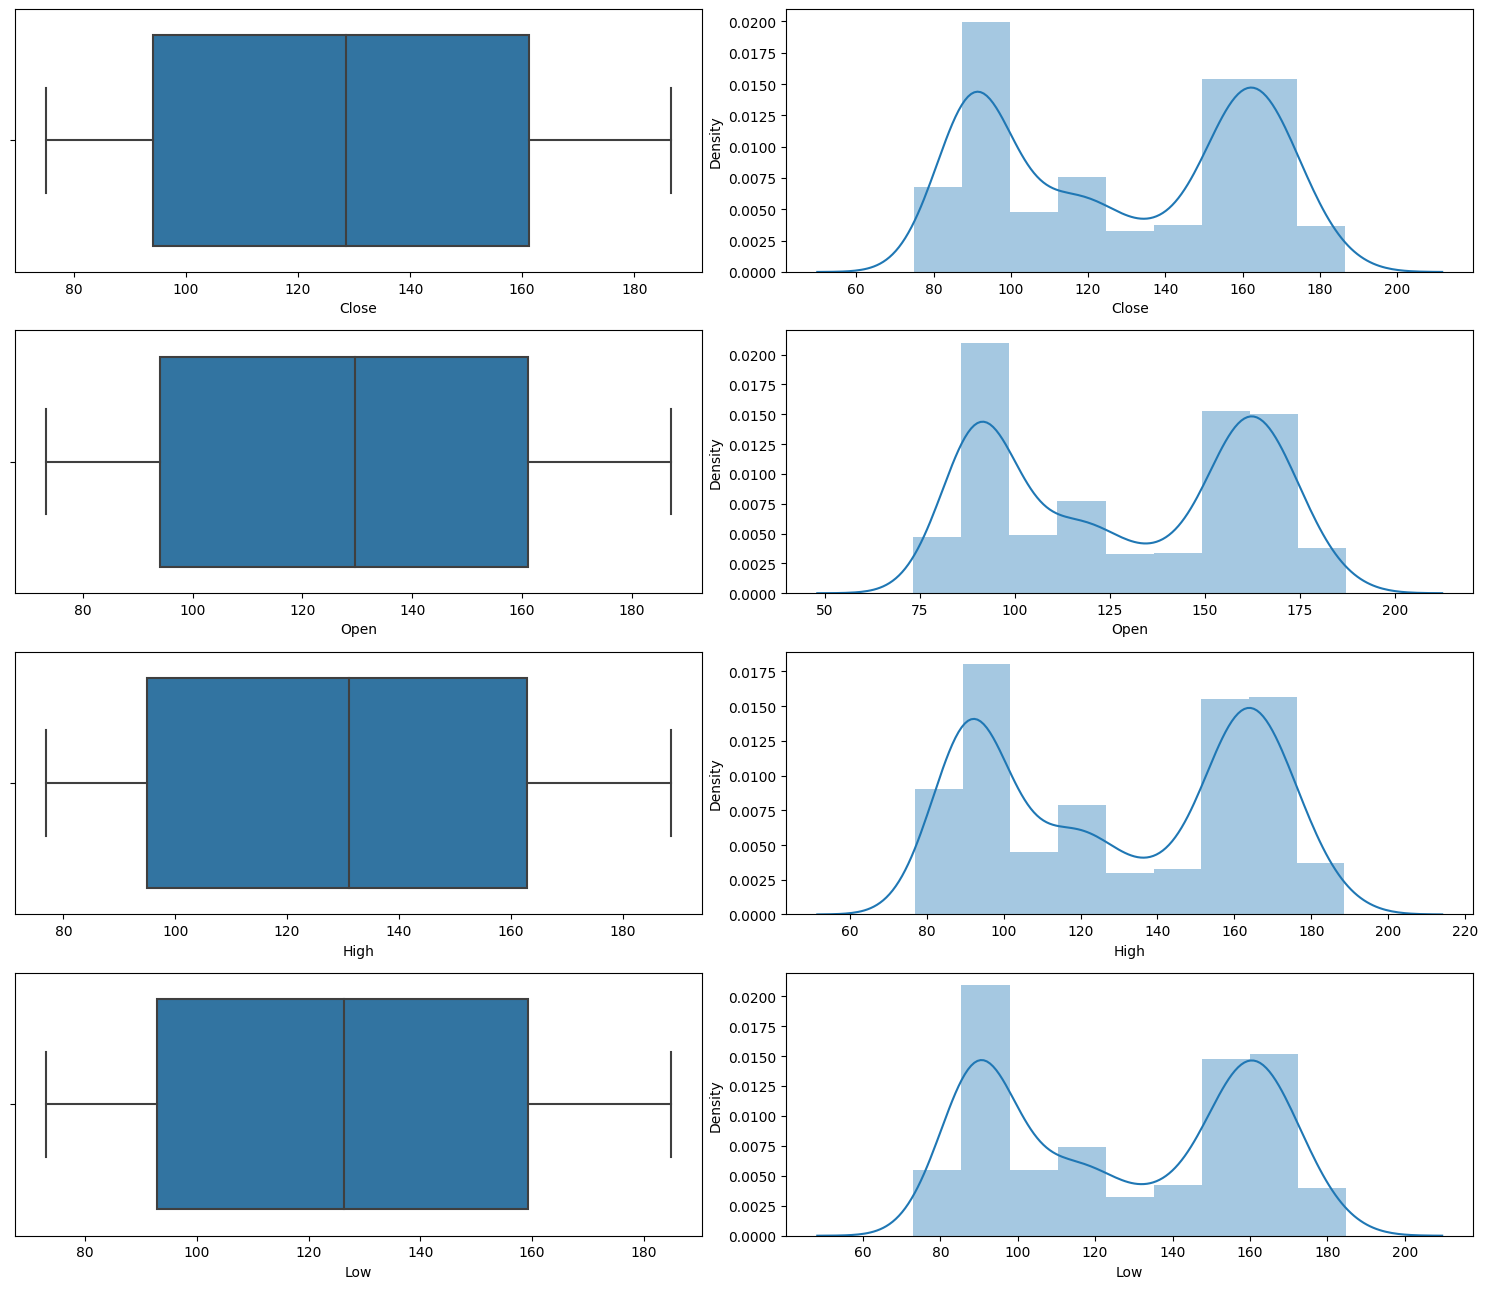

In [81]:
fig, ax = plt.subplots(4, 2, figsize = (15, 13))
sns.boxplot(x= AMZN["Close"], ax = ax[0,0])
sns.distplot(AMZN['Close'], ax = ax[0,1])
sns.boxplot(x= AMZN["Open"], ax = ax[1,0])
sns.distplot(AMZN['Open'], ax = ax[1,1])
sns.boxplot(x= AMZN["High"], ax = ax[2,0])
sns.distplot(AMZN['High'], ax = ax[2,1])
sns.boxplot(x= AMZN["Low"], ax = ax[3,0])
sns.distplot(AMZN['Low'], ax = ax[3,1])
plt.tight_layout()
plt.show()

Fortunately, we did not find any extreme values in our dataset, which will make our model powerful
since the extreme values will not impact. Now we visualize the return and their density:

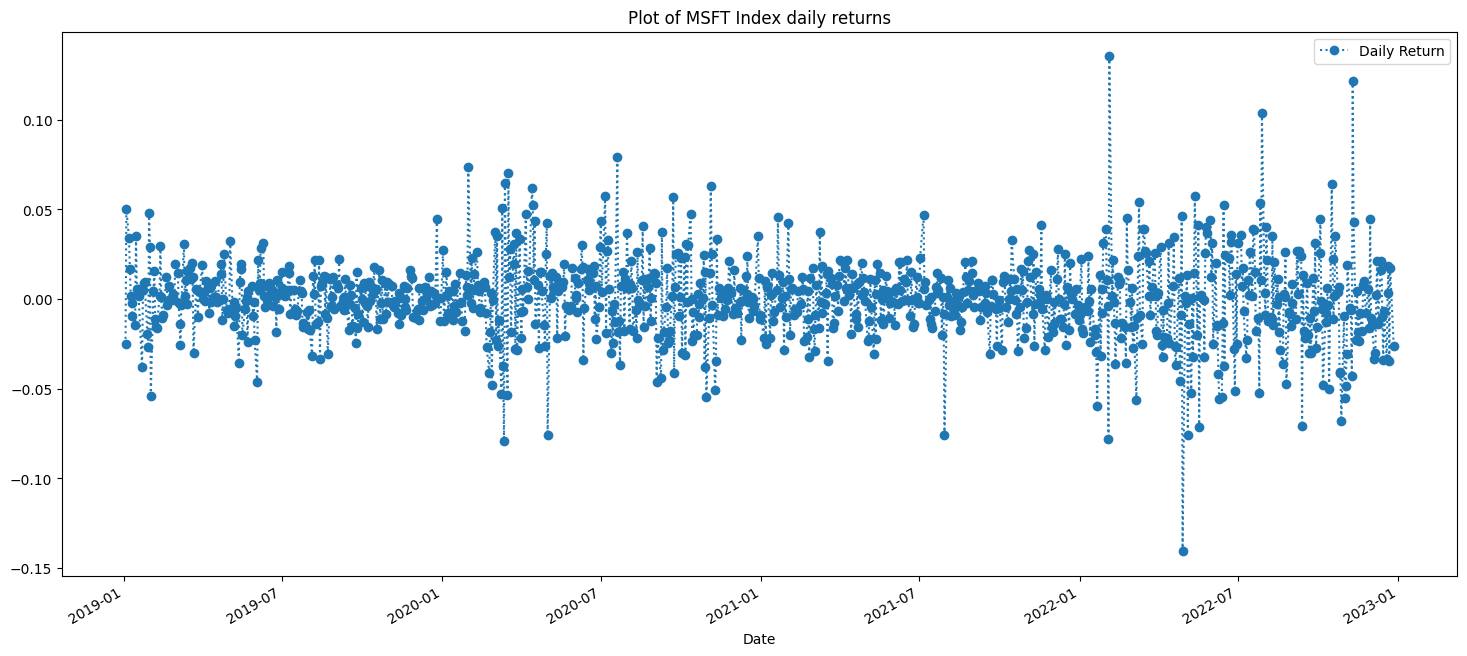

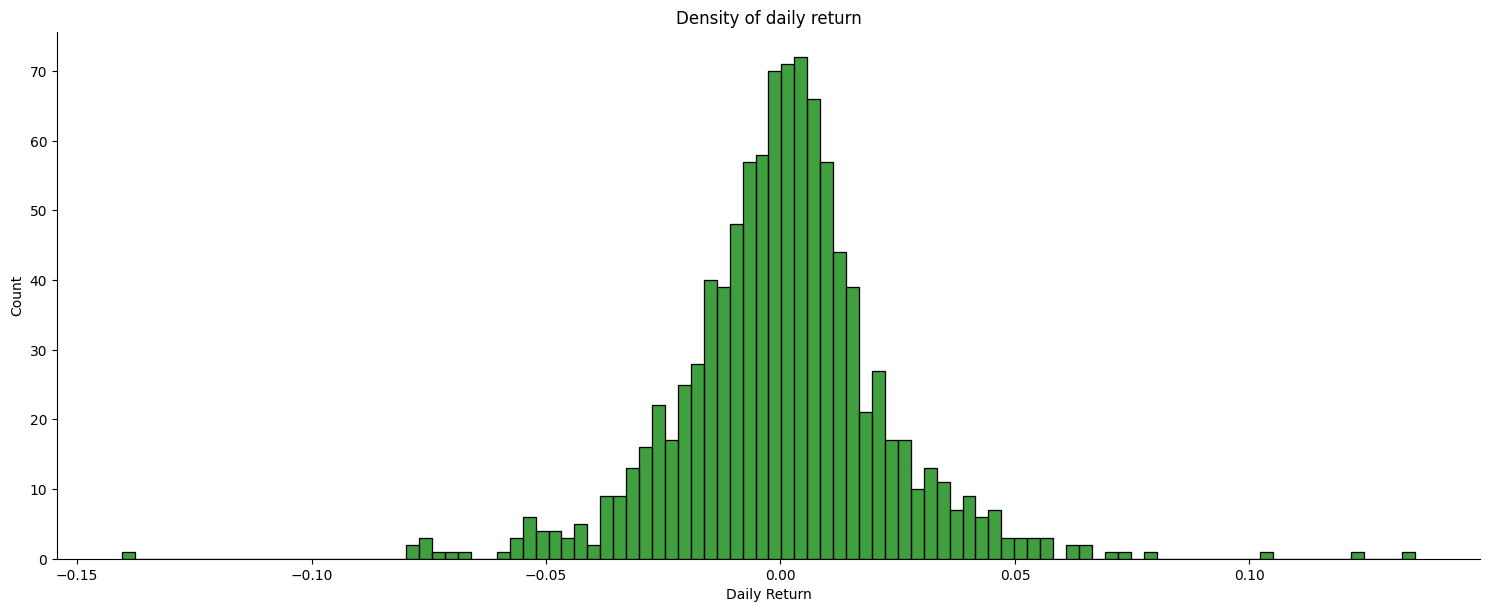

In [82]:
# plot the daily return percentage
AMZN['Daily Return'] = AMZN['Close'].pct_change()
AMZN['Daily Return'].plot(figsize=(18,8),legend=True,linestyle=':',marker='o')
plt.title('Plot of MSFT Index daily returns')
plt.show()
sns.displot(AMZN['Daily Return'].dropna(),bins=100,color='green', height=6,aspect=2.5)
plt.title('Density of daily return')
plt.show()

In [13]:
# Just select the variable Close
close = AMZN[["Close"]]
close.head()

,Close
Date,
2019-01-02 00:00:00-05:00,76.956497
2019-01-03 00:00:00-05:00,75.014000
2019-01-04 00:00:00-05:00,78.769501
2019-01-07 00:00:00-05:00,81.475502
2019-01-08 00:00:00-05:00,82.829002


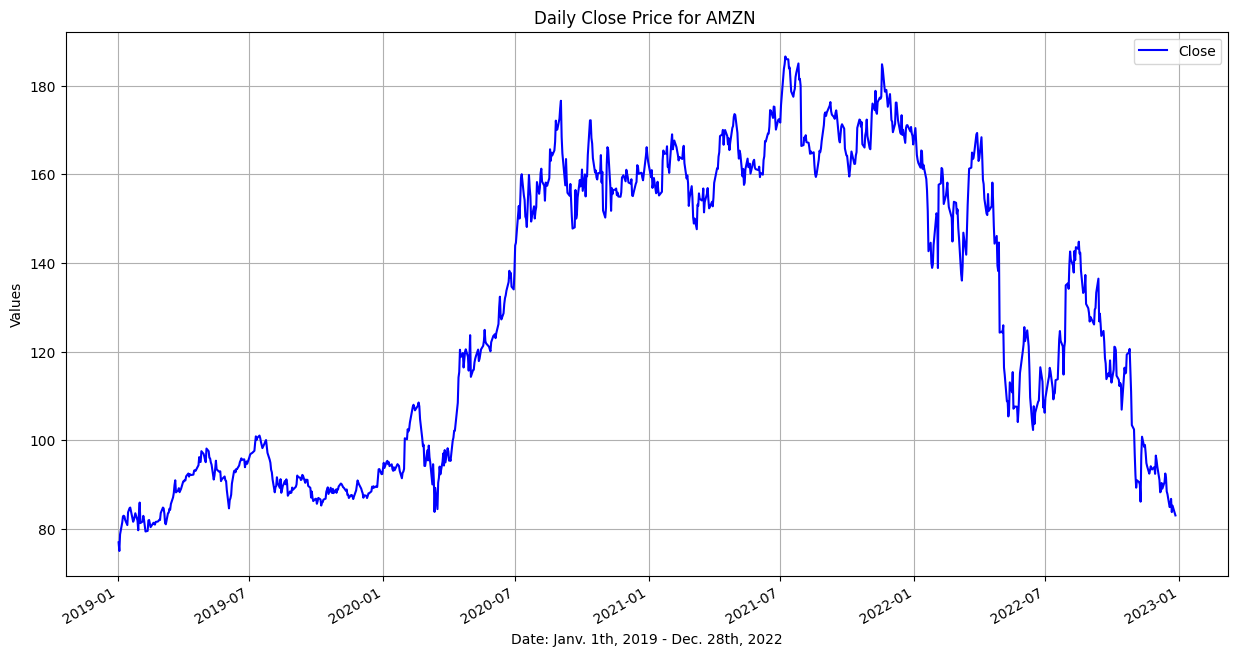

In [14]:
plt.rcParams['figure.figsize'] = (15, 8) # Increases the Plot Size
close['Close'].plot(color='blue',grid = True)
plt.title('Daily Close Price for AMZN ')
plt.xlabel('Date: Janv. 1th, 2019 - Dec. 28th, 2022')
plt.ylabel('Values')
plt.legend()
plt.show()

In [15]:
#Set Target Variable
output_var = AMZN[["Close"]]
#Selecting the Features
features = ["Open", "High","Low"]

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(AMZN[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform,index=AMZN.index)
feature_transform.head()

,Open,High,Low
Date,,,
2019-01-02 00:00:00-05:00,0.000000,0.006872,0.000000
2019-01-03 00:00:00-05:00,0.024052,0.000000,0.016182
2019-01-04 00:00:00-05:00,0.028436,0.025055,0.025663
2019-01-07 00:00:00-05:00,0.060168,0.043202,0.057365
2019-01-08 00:00:00-05:00,0.087542,0.062016,0.069629


In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(AMZN[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform,index=AMZN.index)
feature_transform.head()

,Open,High,Low
Date,,,
2019-01-02 00:00:00-05:00,0.000000,0.006872,0.000000
2019-01-03 00:00:00-05:00,0.024052,0.000000,0.016182
2019-01-04 00:00:00-05:00,0.028436,0.025055,0.025663
2019-01-07 00:00:00-05:00,0.060168,0.043202,0.057365
2019-01-08 00:00:00-05:00,0.087542,0.062016,0.069629


In [18]:
#Splitting to Training set and Test set
from sklearn.model_selection import TimeSeriesSplit
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
    X_train, X_test = feature_transform[:len(train_index)],feature_transform[len(train_index): (len(train_index)+len(test_index))]
    y_train, y_test = output_var[:len(train_index)].values.ravel(),output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()


In [19]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((914, 3), (914,), (91, 3), (91,))

<h4>Data Preprocessing for LSTM model<h4>

In [23]:
#Process the data for LSTM
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

In [24]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((914, 1, 3), (914,), (91, 1, 3), (91,))

<h4>3 Modeling
    
    
    
  
 <h4>

<h4>3.1 Building a multivariate LSTM model for the prediction of the closing price
AMZN<h4>

In [25]:
#Building a simple LSTM Model
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from keras.layers import LSTM
from tensorflow.keras.layers import Dense
from keras.layers import Dense
from keras.layers.core import Dense, Activation, Dropout
from tensorflow.keras.layers import Flatten
lstm = Sequential()
# Input layer
lstm.add(LSTM(220, input_shape=(1, trainX.shape[1]), activation='relu',return_sequences=True))
lstm.add(Dropout(1e-5))
# Hidden layer
lstm.add(LSTM(units = 120,activation='relu'))
lstm.add(Dropout(1e-5))
# Output layer
lstm.add(Dense(1))
lstm.compile(loss='mse', optimizer='adam')

In [26]:
history=lstm.fit(X_train, y_train, epochs=600, batch_size=5,validation_split=.75, verbose=1, shuffle=False)


Epoch 1/600
46/46 [==============================] - 8s 24ms/step - loss: 8009.8579 - val_loss: 21606.5254
Epoch 2/600
46/46 [==============================] - 1s 16ms/step - loss: 7730.2856 - val_loss: 16886.2090
Epoch 3/600
46/46 [==============================] - 1s 32ms/step - loss: 5456.3945 - val_loss: 1883.1768
Epoch 4/600
46/46 [==============================] - 1s 24ms/step - loss: 1067.1337 - val_loss: 10322.0908
Epoch 5/600
46/46 [==============================] - 1s 16ms/step - loss: 80.6123 - val_loss: 10933.0215
Epoch 6/600
46/46 [==============================] - 1s 15ms/step - loss: 59.5643 - val_loss: 9950.3604
Epoch 7/600
46/46 [==============================] - 1s 15ms/step - loss: 56.6923 - val_loss: 9020.6396
Epoch 8/600
46/46 [==============================] - 1s 15ms/step - loss: 52.7612 - val_loss: 8163.9541
Epoch 9/600
46/46 [==============================] - 1s 16ms/step - loss: 48.8287 - val_loss: 7361.3325
Epoch 10/600
46/46 [==============================] 

In [27]:
lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 220)            197120    
                                                                 
 dropout (Dropout)           (None, 1, 220)            0         
                                                                 
 lstm_1 (LSTM)               (None, 120)               163680    
                                                                 
 dropout_1 (Dropout)         (None, 120)               0         
                                                                 
 dense (Dense)               (None, 1)                 121       
                                                                 
Total params: 360,921
Trainable params: 360,921
Non-trainable params: 0
_________________________________________________________________


<h4>3.2 Diagnosing an LSTM Model<h4>

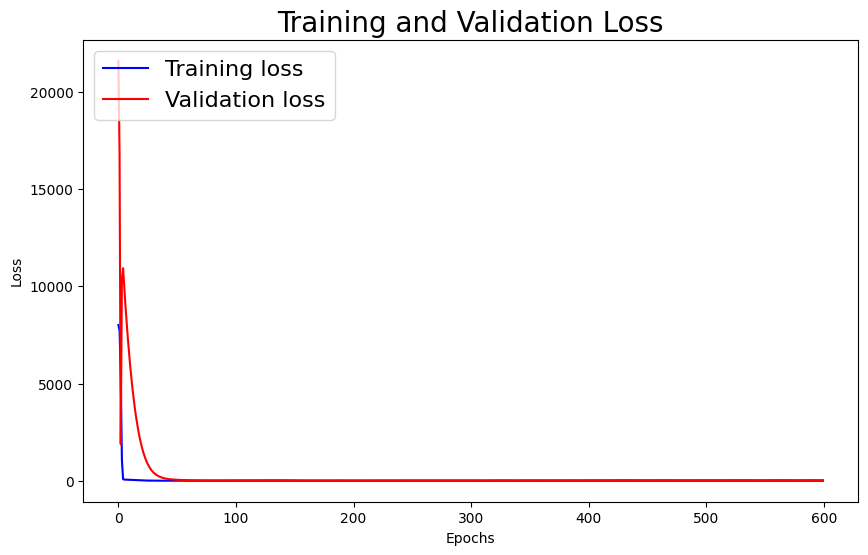

In [28]:
# Plot training & validation loss values
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'],color = 'blue',label="Training loss")
plt.plot(history.history['val_loss'],color = 'red',label="Validation loss")
plt.title('Training and Validation Loss', fontsize=20)
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training loss', 'Validation loss'], loc='upper left', fontsize=16)
plt.show()

• If a model has a low train accuracy and a high train loss, then the model is suffering from
underfitting.

• If a model has a high train accuracy but a low validation accuracy then the model is suffering
from overfitting.

• If the train accuracy model graph converges or concedes with the validation accuracy then
the model is optimal.

==> In our case we found a good LSTM model to predict the closing price values AMZN.

29/29 [==============================] - 0s 2ms/step


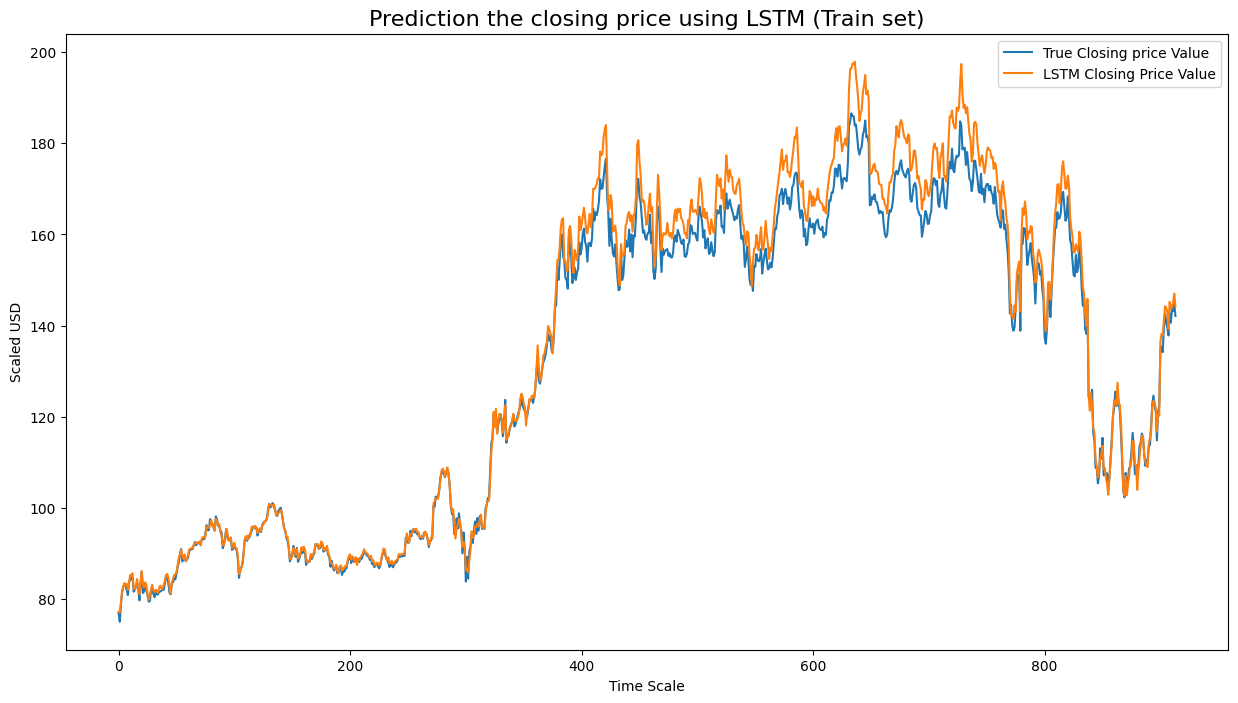

In [31]:
y_pred_train= lstm.predict(X_train)
y_pred_train = y_pred_train.flatten()
plt.plot(y_train, label='True Closing price Value')
plt.plot(y_pred_train, label='LSTM Closing Price Value')
plt.title('Prediction the closing price using LSTM (Train set)',fontsize=16)
plt.xlabel("Time Scale")
plt.ylabel("Scaled USD")
plt.legend()
plt.show()

3/3 [==============================] - 0s 3ms/step


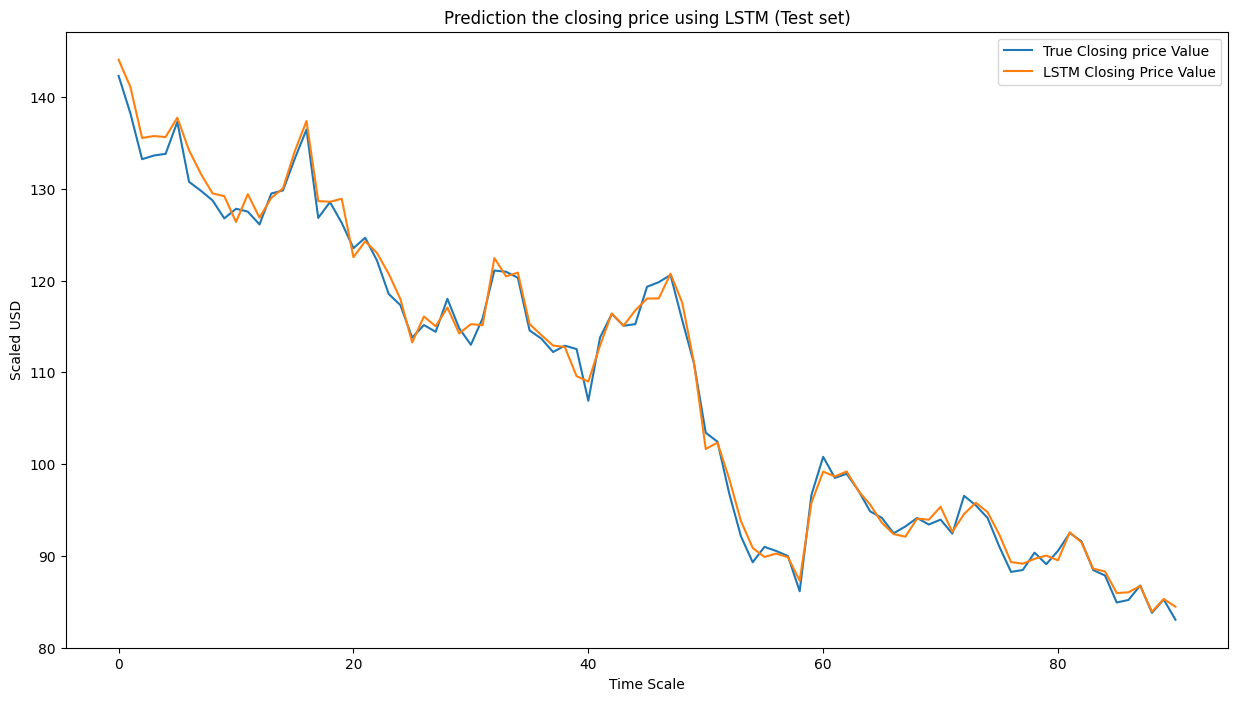

In [32]:
y_pred_test= lstm.predict(X_test)
y_pred_test = y_pred_test.flatten()
plt.plot(y_test, label='True Closing price Value')
plt.plot(y_pred_test, label='LSTM Closing Price Value')
plt.title('Prediction the closing price using LSTM (Test set)' )
plt.xlabel("Time Scale")
plt.ylabel("Scaled USD")
plt.legend()
plt.show()

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,accuracy_score

In [35]:
# Report Accuracy metrics for training
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))*100 # MAPE
    me = np.mean(forecast - actual) # ME
    mae = np.mean(np.abs(forecast - actual)) # MAE
    mpe = np.mean((forecast - actual)/actual) # MPE
    rmse = np.mean((forecast - actual)**2)**.5 # RMSE
    return({'MAPE':mape, 'ME':me, 'MAE': mae, 'MPE': mpe, 'RMSE':rmse})

In [36]:
forecast_accuracy(y_pred_test,y_test)

{'MAPE': 0.8858585022155909,
 'ME': 0.4287016313154619,
 'MAE': 0.9819962218567565,
 'MPE': 0.0036777280328777993,
 'RMSE': 1.2568814672192232}

In [37]:
forecast_accuracy(y_pred_train,y_train)

{'MAPE': 2.133050405362869,
 'ME': 3.0759476926707596,
 'MAE': 3.300941158436581,
 'MPE': 0.0192332262885678,
 'RMSE': 4.498864078979451}

<h4>Splitting Data<h4>

Normalisation is not needed for XGBoost model  Since XGBoost is essentially an ensemble algorithm composed of decision trees, it does not require normalization for the inputs. This is because decision trees do not require normalization of their inputs.

In [38]:
#Splitting to Training set and Test set
from sklearn.model_selection import TimeSeriesSplit
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
    X_train, X_test = feature_transform[:len(train_index)],feature_transform[len(train_index): (len(train_index)+len(test_index))]
    y_train, y_test = output_var[:len(train_index)].values.ravel(),output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()


In [39]:
X_train =np.array(X_train)
X_test =np.array(X_test)

In [40]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((914, 3), (914,), (91, 3), (91,))

<h4>Build XGBoost Model<h4>

To create our model we will initialize it with the following hyperparameters:

• base_score = 0.5

• booster = ‘gbtree’

• n_estimators = 1000

• objective = ‘reg:linear’

• max_depth = 3

• learning_rate = 0.01

The useful technique for developing supervised regression models is XGBoost.The objective function contains loss function and a regularization term. It provides information on
the difference between actual and predicted values, and how far the model’s predictions depart from
the actual values.

In [41]:
model_xgboost = xgb.XGBRegressor(base_score=0.5,
booster='gbtree',
n_estimators=1000,
objective='reg:linear',
max_depth=3,
learning_rate=0.01 )

In [42]:
#fitting our model
model_xgboost.fit(X_train, y_train,

eval_set=[(X_train, y_train), (X_test, y_test)],
early_stopping_rounds=50,
verbose=False) # Change verbose to True if you want to see it␣train

[02:49:11] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

In [43]:
xgb_close=model_xgboost.fit(X_train, y_train)

[02:49:24] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


In [44]:
#Show the model Svr prediction
xgb_prediction_close_test = xgb_close.predict(X_test)
xgb_prediction_close_train = xgb_close.predict(X_train)
#print(Svr_prediction_return)

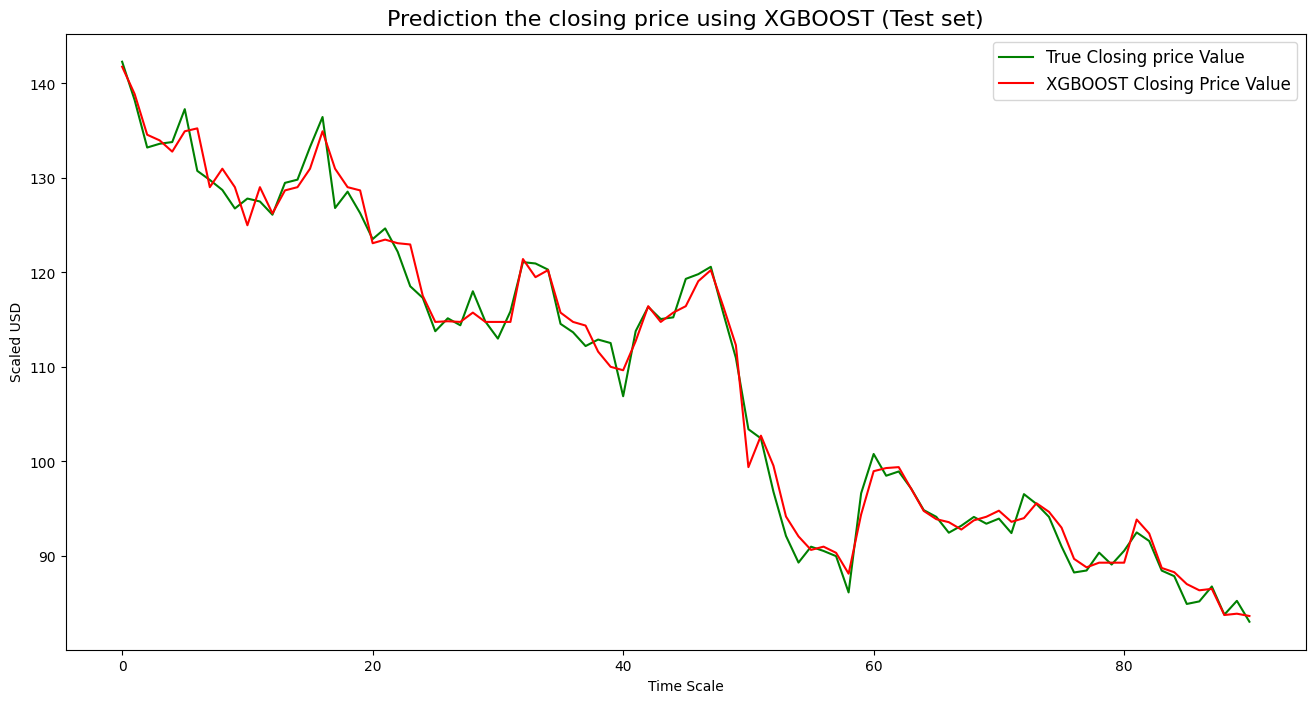

In [45]:
#Plot the models on a graph to see which has the best fit to the original data
plt.figure(figsize=(16,8))
plt.plot(y_test,color= 'green', label= 'True Closing price Value ') # plotting the␣dataset 'test'
plt.plot(xgb_prediction_close_test,color= 'red', label= 'XGBOOST Closing Price Value')
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.title('Prediction the closing price using XGBOOST (Test set)', fontsize=16)
plt.legend(['True Closing price Value','XGBOOST Closing Price Value'], fontsize=12)
plt.show()

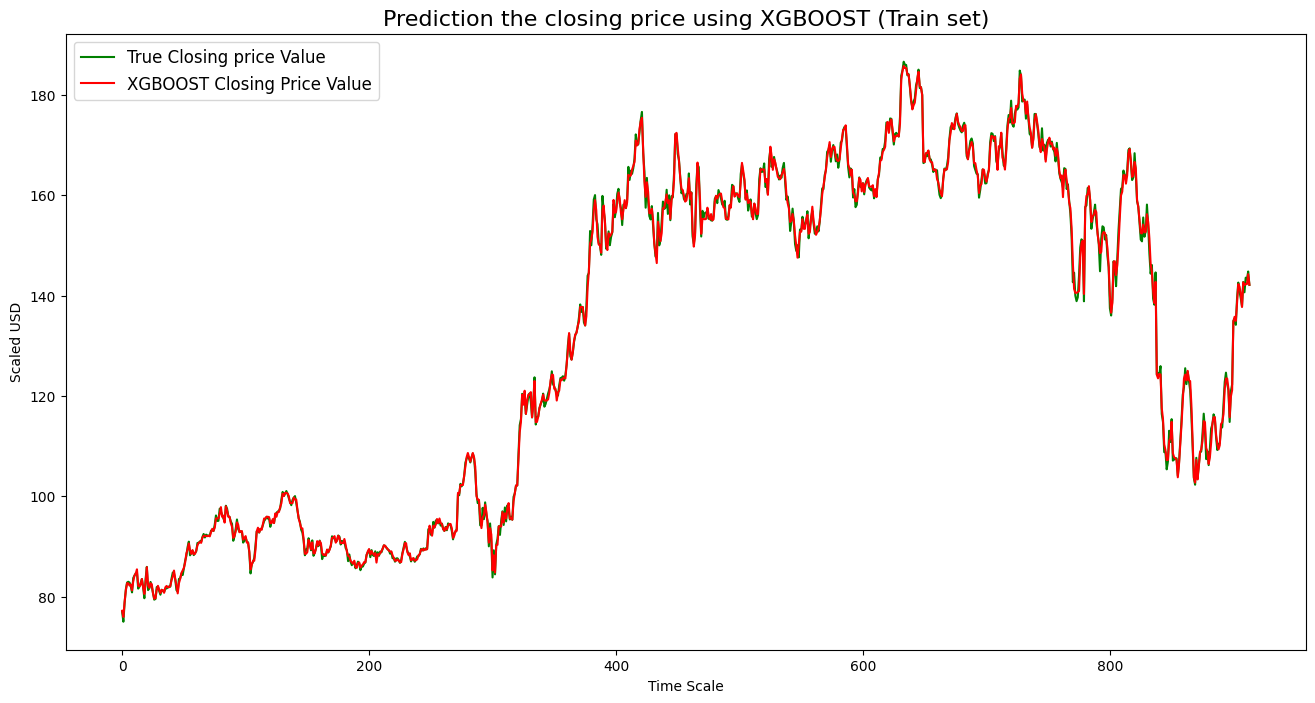

In [46]:
#Plot the models on a graph to see which has the best fit to the original data
plt.figure(figsize=(16,8))
plt.plot(y_train,color= 'green', label= 'True Closing price Value ') # plotting the␣dataset 'test'
plt.plot(xgb_prediction_close_train,color= 'red', label= 'XGBoost Closing Price Value')
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.title('Prediction the closing price using XGBOOST (Train set)', fontsize=16)
plt.legend(['True Closing price Value','XGBOOST Closing Price Value'], fontsize=12)
plt.show()

In [47]:
forecast_accuracy(xgb_prediction_close_test,y_test)

{'MAPE': 1.1207485710136862,
 'ME': 0.23190433376438016,
 'MAE': 1.2185750269627833,
 'MPE': 0.0024149547226922133,
 'RMSE': 1.6002760439342216}

In [48]:
forecast_accuracy(xgb_prediction_close_train,y_train)

{'MAPE': 0.4892944869154959,
 'ME': -0.0059224051511000755,
 'MAE': 0.6481701456483135,
 'MPE': 6.28835841364385e-05,
 'RMSE': 0.8726747781659996}

<h4>Building a SVR Model for closing price of AMZN<h4>

In [50]:
from sklearn.svm import LinearSVR
svm_reg_close = LinearSVR(epsilon=5e-4)

In [51]:
reg_close=svm_reg_close.fit(X_train,y_train)

In [52]:
#Show the model Svr prediction
Svr_prediction_close_test = reg_close.predict(X_test)
Svr_prediction_close_train = reg_close.predict(X_train)
#print(Svr_prediction_return)

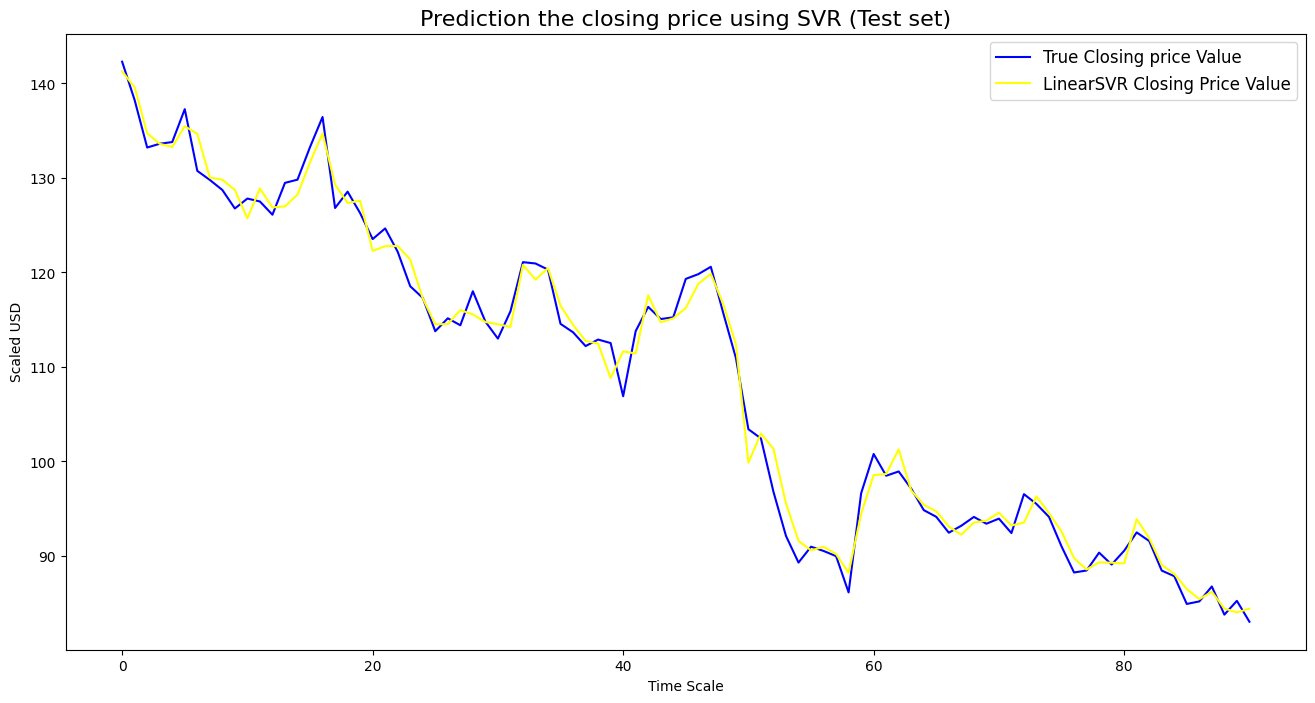

In [53]:
#Plot the models on a graph to see which has the best fit to the original data
plt.figure(figsize=(16,8))
plt.plot(y_test,color= 'blue', label= 'True Closing price Value ') # plotting the␣dataset 'test'
plt.plot(Svr_prediction_close_test,color= 'yellow', label= 'LinearSVR Closing Price Value')
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.title('Prediction the closing price using SVR (Test set)', fontsize=16)
plt.legend(['True Closing price Value','LinearSVR Closing Price Value'], fontsize=12)
plt.show()

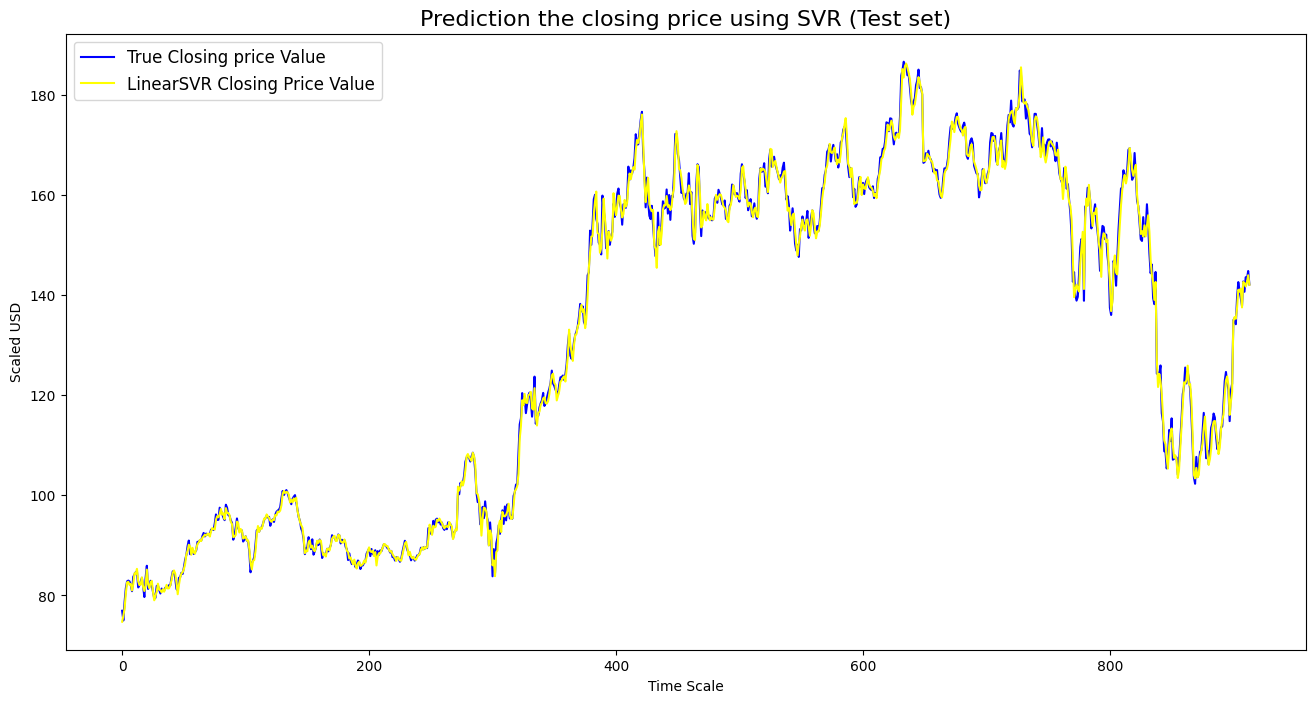

In [54]:
#Plot the models on a graph to see which has the best fit to the original data
plt.figure(figsize=(16,8))
plt.plot(y_train,color= 'blue', label= 'True Closing price Value ') # plotting the␣dataset 'test'
plt.plot(Svr_prediction_close_train,color= 'yellow', label= 'LinearSVR Closing Price Value')
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.title('Prediction the closing price using SVR (Test set)', fontsize=16)
plt.legend(['True Closing price Value','LinearSVR Closing Price Value'], fontsize=12)
plt.show()

In [55]:
forecast_accuracy(Svr_prediction_close_train,y_train)

{'MAPE': 0.8532550749516112,
 'ME': -0.1802597220320273,
 'MAE': 1.142175144100557,
 'MPE': -0.0012596046640462137,
 'RMSE': 1.5381303645954452}

In [56]:
forecast_accuracy(Svr_prediction_close_test,y_test)

{'MAPE': 1.207119286073335,
 'ME': 0.1388423335140595,
 'MAE': 1.305579112815919,
 'MPE': 0.0017120955314150052,
 'RMSE': 1.6706706213603157}

<h4>Building MLP Model<h4>

In [57]:
from sklearn.neural_network import MLPRegressor
# init a model
model_MLP_skl = MLPRegressor(hidden_layer_sizes=(50), activation='relu', solver= 'sgd',

alpha = 0.0001,
batch_size=32,
learning_rate_init=0.001,
max_iter = 1000, verbose = False,
early_stopping=True)

In [58]:
model_MLP_skl.fit(X_train, y_train )

MLPRegressor(batch_size=32, early_stopping=True, hidden_layer_sizes=50,
             max_iter=1000, solver='sgd')

In [59]:
ml_test = model_MLP_skl.predict(X_test)
ml_train=model_MLP_skl.predict(X_train)

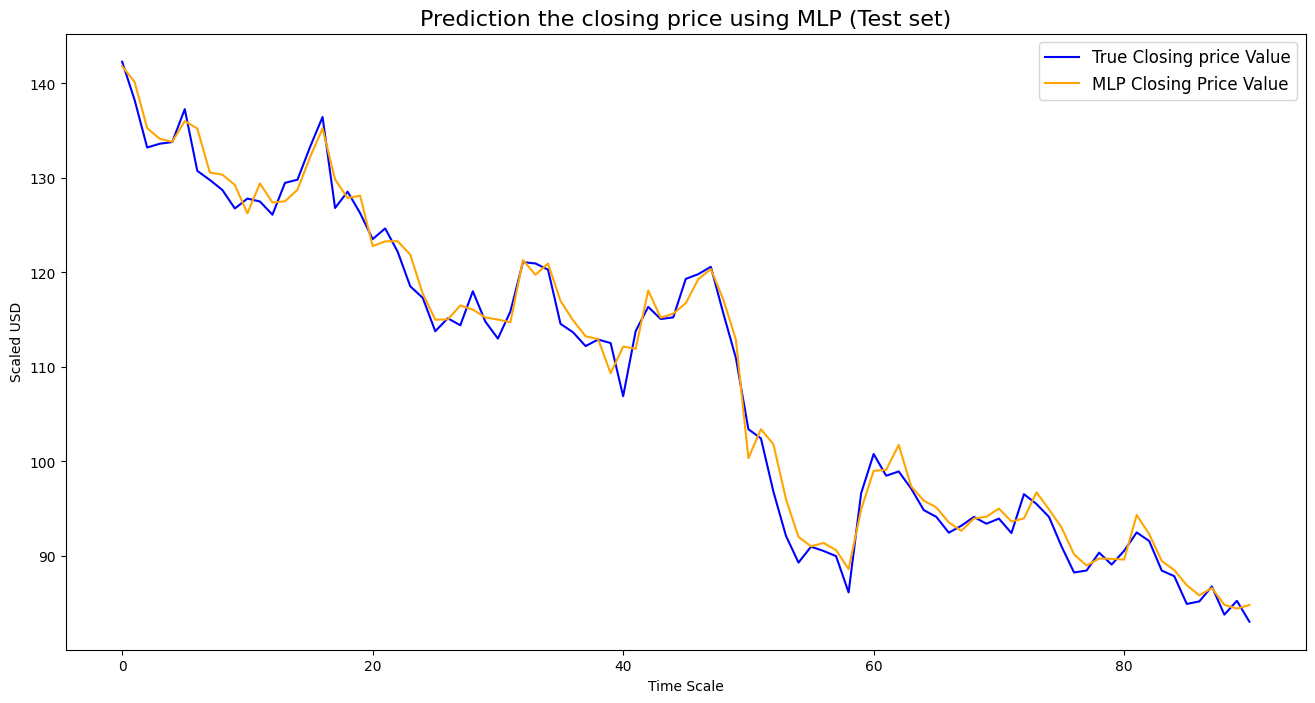

In [60]:
#Plot the models on a graph to see which has the best fit to the original data
plt.figure(figsize=(16,8))
plt.plot(y_test,color= 'blue', label= 'True Closing price Value ') # plotting the␣dataset 'test'
plt.plot(ml_test,color= 'Orange', label= 'MLP Closing Price Value')
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.title('Prediction the closing price using MLP (Test set)', fontsize=16)
plt.legend(['True Closing price Value','MLP Closing Price Value'], fontsize=12)
plt.show()

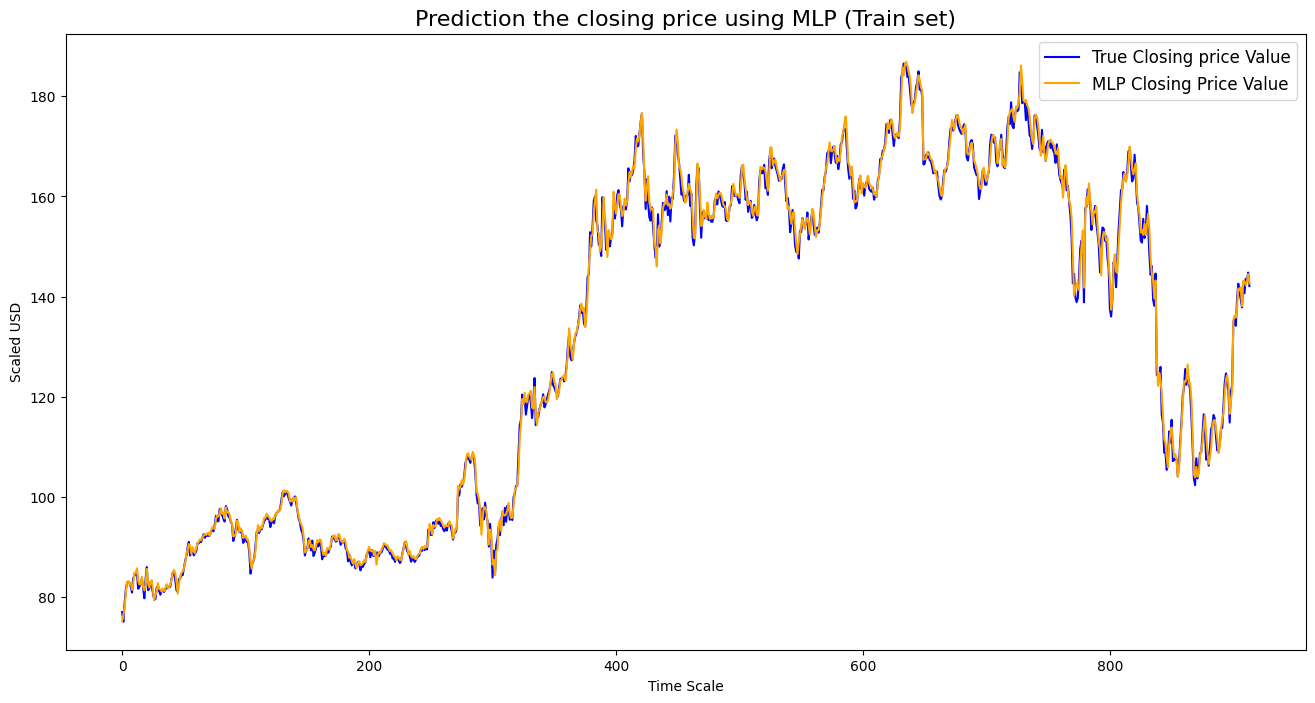

In [61]:
 #Plot the models on a graph to see which has the best fit to the original data
plt.figure(figsize=(16,8))
plt.plot(y_train,color= 'blue', label= 'True Closing price Value ') # plotting the␣dataset 'test'
plt.plot(ml_train,color= 'Orange', label= 'MLP Closing Price Value')
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.title('Prediction the closing price using MLP (Train set)', fontsize=16)
plt.legend(['True Closing price Value','MLP Closing Price Value'], fontsize=12)
plt.show()

In [62]:
forecast_accuracy(ml_train,y_train)

{'MAPE': 0.8927640704557084,
 'ME': 0.3559046822258324,
 'MAE': 1.1831030279066181,
 'MPE': 0.0028934715529019195,
 'RMSE': 1.5664117108676816}

In [63]:
forecast_accuracy(ml_test,y_test)

{'MAPE': 1.325362912819365,
 'ME': 0.6128719999142748,
 'MAE': 1.4167755813933585,
 'MPE': 0.006104492595482516,
 'RMSE': 1.77062128988655}

<h4>Data Preparation<h4>

Before a multivariate series can be modeled, it must be prepared. The CNN model will learn a
function that maps a sequence of past observations as input (X) to observation as output (Y). To
make our model more predictive, we have vectorized the input data, which means that when we
train the model in a sequence of 50 several numbers of data will be introduced in the model

In [65]:
 from sklearn.model_selection import train_test_split
# split a multivariate sequence into samples
X = []
Y = []
# define input sequence
window_size=50 # choose a number of time steps
for i in range(1 , len(AMZN) - window_size -1 , 1):
    first = AMZN.iloc[i,2]
    temp = []
    temp2 = []
    for j in range(window_size): # gather input and output parts of the pattern
        temp.append((AMZN.iloc[i + j, 2] - first) / first)
    temp2.append((AMZN.iloc[i + window_size, 2] - first) / first)
    X.append(np.array(temp).reshape(50, 1))
    Y.append(np.array(temp2).reshape(1, 1))
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1,shuffle=True) # convert into input/output
# define input and output sequences
train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)
# convert to [rows, columns] structure, the dataset knows the number of␣features, e.g. 0 (i.e. train_X.shape[0])
train_X = train_X.reshape(train_X.shape[0],1,50,1)
test_X = test_X.reshape(test_X.shape[0],1,50,1)
print(len(train_X))
print(len(test_X))

857
96


In [66]:
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (857, 1, 50, 1) (857, 1, 1)
Testing data shape :  (96, 1, 50, 1) (96, 1, 1)


 1D CNN
model expects data to have the shape of: [samples, timesteps, features]. But in our case we
will work with CNN-LSTM model i.e. we’ll reshape input from [samples, timesteps, features]
into [samples, subsequences, timesteps, features].

<h4>Building CNN+LSTM MODEL<h4>

To build the CNN model we will first initialize the sequential and then add each layer (Conv1D,
MaxPooling1D, Conv1D, MaxPooling1D,Conv1D, MaxPooling1D, Flatten). The Rectified Linear
Unit (ReLU) function is the most simple and most used activation function. The ReLU function
can be defined as followings:ReLU(X) = max(0, x)

Then we add the LSTM model layers (Bidirectional, Dropout, Bidirectional, Dropout). The process
can be summarized as follows:
Using a 1D convolution with three layers followed by a maximum pooling layer, the layers are
created with sizes 64,128,64 with kernel size = 3. The output is then flattened to feed the Bi-LSTM
layers. The model has two hidden LSTM layers followed by a dense layer to provide the output.

<h4>importing librairies<h4>

In [68]:
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional,TimeDistributed
from tensorflow.keras.layers import MaxPooling1D, Flatten
from tensorflow.keras.regularizers import L1, L2
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.metrics import RootMeanSquaredError

In [69]:
 # define model CNN layers
model = tf.keras.Sequential()

# first input model CNN_1 with three layers
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu',input_shape=(None, 49, 1))))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(128, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Flatten()))
# model.add(Dense(5, kernel_regularizer=L2(0.01)))
# LSTM layers
model.add(Bidirectional(LSTM(50, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(50, return_sequences=False)))
model.add(Dropout(0.5))
#Final layers
model.add(Dense(1, activation='linear'))

The Adam (Adaptive Moment Estimation) optimizer, one of the most common optimization tech-
niques, is used to compile the model after it has been generated:

In [70]:
# Compile the Model
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])

In [71]:
# Fit CNN-LSTM model 'Train the Model'
history = model.fit(train_X, train_Y, validation_data=(test_X,test_Y),epochs=60,batch_size=40, verbose=1, shuffle =True)

Epoch 1/60
22/22 [==============================] - 22s 93ms/step - loss: 0.0163 - mse: 0.0163 - mae: 0.0934 - val_loss: 0.0122 - val_mse: 0.0122 - val_mae: 0.0872
Epoch 2/60
22/22 [==============================] - 0s 12ms/step - loss: 0.0090 - mse: 0.0090 - mae: 0.0709 - val_loss: 0.0077 - val_mse: 0.0077 - val_mae: 0.0673
Epoch 3/60
22/22 [==============================] - 0s 12ms/step - loss: 0.0065 - mse: 0.0065 - mae: 0.0599 - val_loss: 0.0062 - val_mse: 0.0062 - val_mae: 0.0585
Epoch 4/60
22/22 [==============================] - 0s 11ms/step - loss: 0.0050 - mse: 0.0050 - mae: 0.0536 - val_loss: 0.0055 - val_mse: 0.0055 - val_mae: 0.0547
Epoch 5/60
22/22 [==============================] - 0s 11ms/step - loss: 0.0042 - mse: 0.0042 - mae: 0.0493 - val_loss: 0.0049 - val_mse: 0.0049 - val_mae: 0.0514
Epoch 6/60
22/22 [==============================] - 0s 12ms/step - loss: 0.0040 - mse: 0.0040 - mae: 0.0474 - val_loss: 0.0057 - val_mse: 0.0057 - val_mae: 0.0592
Epoch 7/60
22/22 [===

In [72]:
# demonstrate the model parameters
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, 1, 48, 64)        256       
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, 1, 24, 64)        0         
 tributed)                                                       
                                                                 
 time_distributed_2 (TimeDis  (None, 1, 22, 128)       24704     
 tributed)                                                       
                                                                 
 time_distributed_3 (TimeDis  (None, 1, 11, 128)       0         
 tributed)                                                       
                                                                 
 time_distributed_4 (TimeDis  (None, 1, 9, 64)        

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, 1, 48, 64)        256       
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, 1, 24, 64)        0         
 tributed)                                                       
                                                                 
 time_distributed_2 (TimeDis  (None, 1, 22, 128)       24704     
 tributed)                                                       
                                                                 
 time_distributed_3 (TimeDis  (None, 1, 11, 128)       0         
 tributed)                                                       
                                                                 
 time_distributed_4 (TimeDis  (None, 1, 9, 64)        

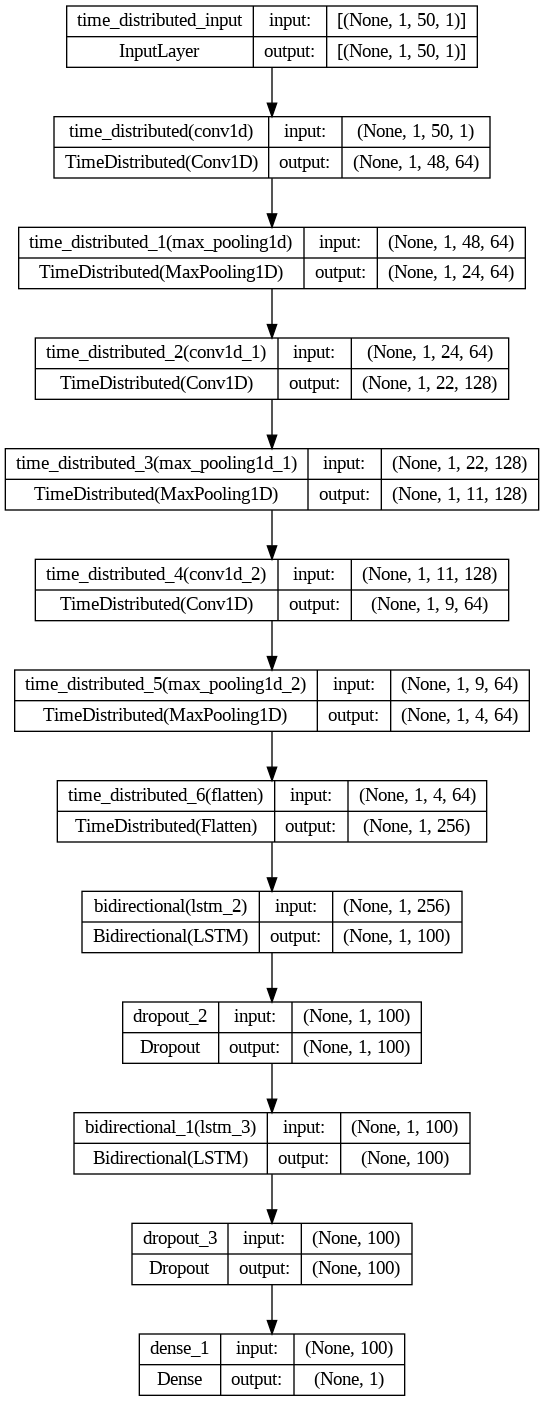

In [73]:
# After the model has been constructed, we'll summarise it
from tensorflow.keras.utils import plot_model
print(model.summary())
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [74]:
model.evaluate(test_X, test_Y)

3/3 [==============================] - 0s 11ms/step - loss: 0.0021 - mse: 0.0021 - mae: 0.0363


[0.0021126000210642815, 0.0021126000210642815, 0.03626815602183342]

In [75]:
test_eval = model.evaluate(test_X, test_Y, verbose=0)

In [76]:
print('Loss:', test_eval[0])
print('MSE:', test_eval[1])
print('MAE:', test_eval[2])

Loss: 0.0021126000210642815
MSE: 0.0021126000210642815
MAE: 0.03626815602183342


<h4>Forecasting<h4>

In [77]:
from sklearn.metrics import explained_variance_score, mean_poisson_deviance,mean_gamma_deviance
from sklearn.metrics import r2_score
from sklearn.metrics import max_error
# predict probabilities for test set
yhat_probs = model.predict(test_X, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
var = explained_variance_score(test_Y.reshape(-1,1), yhat_probs)
print('Variance: %f' % var)
r2 = r2_score(test_Y.reshape(-1,1), yhat_probs)
print('R2 Score: %f' % var)
var2 = max_error(test_Y.reshape(-1,1), yhat_probs)
print('Max Error: %f' % var2)

Variance: 0.917537
R2 Score: 0.917537
Max Error: 0.141377


3/3 [==============================] - 0s 9ms/step


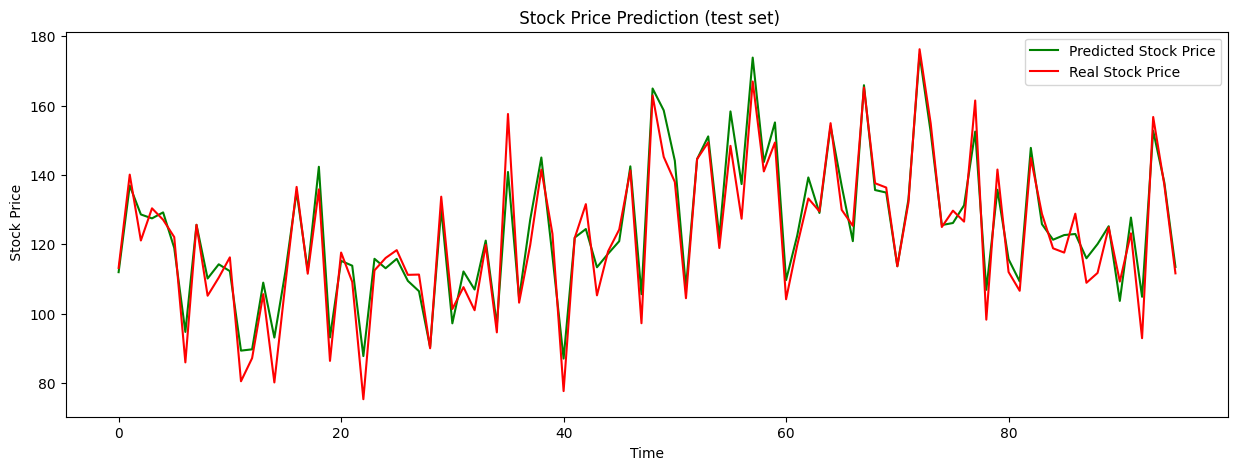

In [78]:
predicted_test = model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted_test = np.array(predicted_test[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp = AMZN.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted_test[j - len_t] = predicted_test[j - len_t] * temp + temp
fig = plt.figure(figsize=(15,5))
plt.plot(predicted_test, color = 'green', label = 'Predicted Stock Price')
plt.plot(test_label, color = 'red', label = 'Real Stock Price')
plt.title(' Stock Price Prediction (test set)')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

In [79]:
 forecast_accuracy(predicted_test,test_label)

{'MAPE': 3.8529019198961136,
 'ME': 1.8447172769605167,
 'MAE': 4.3891895757745445,
 'MPE': 0.01920736292894306,
 'RMSE': 5.533262536769962}

<h4> Benchmarking <h4>

<table style='float:left;'>
    <tr>
        <th style='text-allign: center;'>Errors</th>
        <th style='text-allign: center;'>Series</th>
        <th style='text-allign: center;'>ME</th>
        <th style='text-allign: center;'>MAPE(%)</th>
        <th style='text-allign: center;'>MAE</th>
        <th style='text-allign: center;'>MPE</th>
        <th style='text-allign: center;'>RMSE</th>
    </tr>
    <tr>
        <td style='text-allign: center;'>LSTM</td>
        <td style='text-allign: center;'>Train</td>
        <td style='text-allign: center;'>3.57</td>
        <td style='text-allign: center;'>2.41</td>
        <td style='text-allign: center;'>3.76</td>
        <td style='text-allign: center;'>0.02</td>
        <td style='text-allign: center;'>5.13</td>
      </tr>
    <tr>
        <td style='text-allign: center;'>LSTM</td>
        <td style='text-allign: center;'>test</td>
        <td style='text-allign: center;'>0.61</td>
        <td style='text-allign: center;'>0.48</td>
        <td style='text-allign: center;'> 0.64</td>
        <td style='text-allign: center;'>6.28e-05</td>
        <td style='text-allign: center;'>0.87</td>
       </tr>
    <tr>
        <td style='text-allign: center;'>XGBOOST</td>
        <td style='text-allign: center;'>Train</td>
        <td style='text-allign: center;'>-0.005</td>
        <td style='text-allign: center;'>0.48</td>
        <td style='text-allign: center;'>0.64</td>
        <td style='text-allign: center;'>6.28e-05</td>
        <td style='text-allign: center;'>0.87</td>
    </tr>
    <tr>
        <td style='text-allign: center;'>XGBOOST</td>
        <td style='text-allign: center;'>Test</td>
        <td style='text-allign: center;'>0.23</td>
        <td style='text-allign: center;'>1.12</td>
        <td style='text-allign: center;'>1.21</td>
        <td style='text-allign: center;'>0.002</td>
        <td style='text-allign: center;'>1.60</td>
        </tr>
    <tr>
        <td style='text-allign: center;'>SVR</td>
        <td style='text-allign: center;'>Train</td>
        <td style='text-allign: center;'>-0.18</td>
        <td style='text-allign: center;'>0.85</td>
        <td style='text-allign: center;'>1.14</td>
        <td style='text-allign: center;'>-0.001</td>
        <td style='text-allign: center;'>1.53</td>
        </tr>
    <tr>
        <td style='text-allign: center;'>SVR</td>
        <td style='text-allign: center;'>Test</td>
        <td style='text-allign: center;'> 0.13</td>
        <td style='text-allign: center;'> 1.20</td>
        <td style='text-allign: center;'> 1.30</td>
        <td style='text-allign: center;'>0.0016</td>
        <td style='text-allign: center;'> 1.67</td>
        </tr>
    <tr>
        <td style='text-allign: center;'>MLP</td>
        <td style='text-allign: center;'>Train</td>
        <td style='text-allign: center;'>0.039</td>
        <td style='text-allign: center;'>0.85</td>
        <td style='text-allign: center;'>1.14</td>
        <td style='text-allign: center;'>0.0004</td>
        <td style='text-allign: center;'>1.53</td>
        </tr>
    <tr>
        <td style='text-allign: center;'>MLP</td>
        <td style='text-allign: center;'>Test</td>
        <td style='text-allign: center;'> 0.34</td>
        <td style='text-allign: center;'>1.25</td>
        <td style='text-allign: center;'>1.35</td>
        <td style='text-allign: center;'> 0.0036</td>
        <td style='text-allign: center;'>1.71</td>
        </tr>
      <tr>
        <td style='text-allign: center;'>CNN+LSTM</td>
        <td style='text-allign: center;'>Test</td>
        <td style='text-allign: center;'>-1.00</td>
        <td style='text-allign: center;'>3.63</td>
        <td style='text-allign: center;'>4.42</td>
        <td style='text-allign: center;'>-0.005</td>
        <td style='text-allign: center;'>6.62</td>
        </tr>
   
    
    
   
        
    